# Sensitivity Analysis of an external model with time-series output


Notebook developed by Saman Razavi and Cordell Blanchard

### For the VARS method, please cite:

Razavi, S., & Gupta, H. V. (2016). A new framework for comprehensive, robust, and efficient global sensitivity analysis: 1. Theory. Water Resources Research, 52(1), 423-439. https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2015WR017558

Razavi, S., & Gupta, H. V. (2016). A new framework for comprehensive, robust, and efficient global sensitivity analysis: 2. Application. Water Resources Research, 52(1), 440-455. https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1002/2015WR017559

### For the Generalized VARS (G-VARS) method, please cite:

Do, N. C., & Razavi, S. (2020). Correlation effects? A major but often neglected component in sensitivity and uncertainty analysis. Water Resources Research, 56(3), e2019WR025436. https://doi.org/10.1029/2019WR025436

### For the VARS method on dynamical model response, please cite:

Razavi, S., & Gupta, H. V. (2019). A multi-method Generalized Global Sensitivity Matrix approach to accounting for the dynamical nature of earth and environmental systems models. Environmental modelling & software, 114, 1-11. https://doi.org/10.1016/j.envsoft.2018.12.002

## Exercise 8: How to run VARS/G-VARS in the ‘off-line’ mode for time-series outputs
### Objective:

This notebook extends the previous exercise to external models with time-series outputs. 

First import the needed librares, including `TSVARS` and `TSGVARS` for time-varying sensitivity analysis with VARS and G-VARS.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from varstool import TSVARS, TSGVARS

### Set up an off-line experiment

The example experiments bellow are with the HBV-SASK model, assuming that it runs externally. The user needs to update attributes of the experiment in accordance with the properties of the external model examined.

**Experiment 1** is to demonstrate how to run **TSVARS** in the off-line mode.

**Experiment 2** is to demonstrate how to run **TSGVARS** in the off-line mode.

In [2]:
# Define Experiment 1

experiment_1 = TSVARS(parameters = { # name   lower bound   upper bound
                                      'TT'   :  [ -4.00   ,   4.00],
                                      'C0'   :  [  0.00   ,   10.0],
                                      'ETF'  :  [  0.00   ,   1.00],
                                      'LP'   :  [  0.00   ,   1.00],
                                      'FC'   :  [  50.0   ,   500 ],
                                      'beta' :  [  1.00   ,   3.00],
                                      'FRAC' :  [  0.10   ,   0.90],
                                      'K1'   :  [  0.05   ,   1.00],
                                      'alpha':  [  1.00   ,   3.00],
                                      'K2'   :  [  0.00   ,   0.05],
                                      'UBAS' :  [  1.00   ,   3.00],
                                      'PM'   :  [  0.50   ,   2.00],},
                      num_stars        = 10,
                      delta_h          = 0.1,
                      ivars_scales     = (0.1, 0.3, 0.5),
                      sampler          = 'lhs',
                      seed             = 123456789,
                      bootstrap_flag   = True,
                      bootstrap_size   = 1000,
                      bootstrap_ci     = 0.9,
                      grouping_flag    = True,
                      num_grps         = 3,
                      report_verbose   = True,                   
                      func_eval_method ='serial', # The parallel version needs further development and testing
                      vars_eval_method ='serial', # The parallel version needs further development and testing
                      vars_chunk_size  = None,
                     )

In [3]:
# Define Experiment 2

my_parameters = { # name  dist_par1  dist_par1  dist_par1  dist_type
                 'TT'   : (  0.940  ,  0.980  ,   None   , 'unif'     ),
                 'C0'   : (  0.782  ,  0.003  ,   None   , 'norm'     ),
                 'ETF'  : (  0.126  ,  0.008  ,   None   , 'norm'     ),
                 'LP'   : (  0.670  ,  0.018  ,   None   , 'norm'     ),
                 'FC'   : (  227.53 ,  6.930  ,   None   , 'norm'     ),
                 'beta' : (  2.600  ,  3.000  ,  3.000   , 'triangle' ),
                 'FRAC' : (  0.628  ,  0.011  ,   None   , 'norm'     ),
                 'K1'   : (  0.050  ,  0.054  ,  0.050   , 'triangle' ),
                 'alpha': (  1.602  ,  0.011  ,   None   , 'norm'     ),
                 'K2'   : (  0.022  ,  0.001  ,   None   , 'norm'     ),
                 'UBAS' : (  1.000  ,  1.200  ,  1.000   , 'triangle'  ),
                 'PM'   : (  0.980  ,  1.020  ,   None   , 'unif'     ),}

my_corr_mat = np.array([[    1, 0.65,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
                        [ 0.65,    1,    0,    0,    0,    0,    0,    0,    0, 0.12,    0,    0],
                        [    0,    0,    1, 0.12,-0.18, 0.13,    0,    0,    0,-0.22,    0,    0],
                        [    0,    0, 0.12,    1, 0.54, 0.71,-0.14,    0,    0,    0,    0,    0],
                        [    0,    0,-0.18, 0.54,    1, 0.34, 0.20, 0.11,    0, 0.38,    0,    0],
                        [    0,    0, 0.13, 0.71, 0.34,    1,-0.11,    0,    0,-0.13,    0,    0],
                        [    0,    0,    0,-0.14, 0.20,-0.11,    1,    0,-0.69,-0.39,-0.19,    0],
                        [    0,    0,    0,    0, 0.11,    0,    0,    1,-0.34,    0,    0,    0],
                        [    0,    0,    0,    0,    0,    0,-0.69,-0.34,    1, 0.41, 0.40,    0],
                        [    0, 0.12,-0.22,    0, 0.38,-0.13,-0.39,    0, 0.41,    1, 0.14,    0],
                        [    0,    0,    0,    0,    0,    0,-0.19,    0,  0.4, 0.14,    1,    0],
                        [    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1]])

my_num_dir_samples = 10

my_delta_h = 0.1
# my_delta_h = 1 / my_num_dir_samples # or choose values such as 0.1

experiment_2 = TSGVARS(parameters     = my_parameters,
                    corr_mat        = my_corr_mat,
                    num_stars       = 20,
                    num_dir_samples = my_num_dir_samples,
                    delta_h         = my_delta_h,
                    ivars_scales    = (0.1, 0.3, 0.5),
                    sampler         = 'plhs',
                    slice_size      = 10,
                    seed            = 123456789,
                    bootstrap_flag  = False,
                    bootstrap_size  = 100,
                    bootstrap_ci    = 0.9,
                    grouping_flag   = False,
                    num_grps        = 3,
                    report_verbose  = True,
                    )

### Step 1: Run initial parts of TSVARS/TSGVARS to generate all sample points

Use function `generate_star` to generate all star points and print them in a .csv file. 

In [ ]:
# Run Experiment 1 and check out the star points
Ex1_star_points = experiment_1.generate_star()
display(Ex1_star_points)
Ex1_star_points.to_csv('8a - Ex1_star_points.csv')

In [ ]:
# Run Experiment 2 and check out the star points
Ex2_star_points = experiment_2.generate_star()
display(Ex2_star_points)
Ex2_star_points.to_csv('8a - Ex2_star_points.csv')

### Step 2: Run your external model off-line

In this step, you may leave this notebook, run your model externally for all the input sets printed in the above .csv file, and then add the model outputs to that .csv file in new columns. Basically, the output of each model run should be added row-wise, next to the respective model inputs. You may refer to the example.

When you are done with this step, proceed to the next step.

***
(Here, for demonstration purpose only, you may go to the last section of this notebook to see an example based on the HBV-SASK model.)
***

### Step 3: Read in the outputs of the external model and run the rest of VARS/G-VARS

Read the updated .csv file including the model outputs and convert it back to a dataframe. The dataframe is the standard format expected to be inputted into the `run_offline` method next.

In [4]:
# Read Experiment 1 model outputs
Ex1_modelframe = pd.read_csv('8b - Ex1_model_time_series_outputs.csv', index_col=[0, 1, 2])
Ex1_modelframe

2005-10-01  2005-10-02  2005-10-03  2005-10-04  \
centre param point                                                   
0      TT    0       15.042429   18.813523   15.795275   13.006481   
             1       15.048051   18.819063   15.800735   13.011863   
             2       15.057955   18.829256   15.810189   13.020775   
             3       15.069459   18.841263   15.821106    9.290431   
             4       15.072230   18.844042   15.823778    9.292961   
...                        ...         ...         ...         ...   
9      PM    5       56.117995   56.845991   43.314279   32.408736   
             6       67.699001   69.248335   52.539163   39.120164   
             7       79.524586   82.011777   62.046899   46.065810   
             8       91.367283   95.032056   71.785045   53.232130   
             9      103.540572  108.235098   81.720368   60.615171   

                    2005-10-05  2005-10-06  2005-10-07  2005-10-08  \
centre param point                                                   
0      TT    0       14.676629   11.272543    9.043326    9.393227   
             1       14.681933   11.277771    9.048479    9.398305   
             2       14.691013   11.286239    9.056586    9.406399   
             3        9.721272   12.921267   12.637023   11.388479   
             4        7.206359    6.385414   12.337330   17.492589   
...                        ...         ...         ...         ...   
9      PM    5       31.914662   31.428322   40.535609   57.821703   
             6       38.521341   37.932299   50.194249   68.109785   
             7       45.356611   44.659853   58.992456   77.948286   
             8       52.406533   51.596982   67.137958   87.836068   
             9       59.666719   58.739233   75.343609   97.632181   

                    2005-10-09  2005-10-10  ...  2006-09-21  2006-09-22  \
centre param point                          ...                           
0      TT    0        9.191692    7.223959  ...    1.781663    1.861255   
             1        9.196696    7.228891  ...    1.784919    1.864467   
             2        9.204677    7.236515  ...    1.788789    1.868278   
             3        9.988278    7.490645  ...    1.808886    1.888087   
             4       11.560116    7.905817  ...    1.868223    1.946570   
...                        ...         ...  ...         ...         ...   
9      PM    5       46.769863   32.270452  ...   10.486704   10.485051   
             6       54.549937   39.136950  ...   12.408351   12.466383   
             7       63.405931   47.059905  ...   14.496433   14.650117   
             8       73.237685   55.865081  ...   16.710397   17.009500   
             9       81.936982   65.689631  ...   19.020659   19.531425   

                    2006-09-23  2006-09-24  2006-09-25  2006-09-26  \
centre param point                                                   
0      TT    0        1.933946    1.817831    1.702153    1.620545   
             1        1.937114    1.820950    1.705225    1.623571   
             2        1.940868    1.824653    1.708876    1.627171   
             3        1.960392    1.843893    1.727836    1.645855   
             4        2.018033    1.900695    1.783813    1.701020   
...                        ...         ...         ...         ...   
9      PM    5       10.395480   10.193481    9.989341    9.801855   
             6       12.381465   12.104377   11.832182   11.593200   
             7       14.574411   14.188258   13.827757   13.528298   
             8       16.944983   16.403421   15.933766   15.567217   
             9       19.473519   18.715508   18.118109   17.681184   

                    2006-09-27  2006-09-28  2006-09-29  2006-09-30  
centre param point                                                  
0      TT    0        1.603267    1.597106    1.536442    1.484981  
             1        1.606249    1.600045    1.539338    1.487835  
             2        1.609797    1

In [5]:
# Read Experiment 2 model outputs
Ex2_modelframe = pd.read_csv('8b - Ex2_model_time_series_outputs.csv', index_col=[0, 1, 2])
Ex2_modelframe

2005-10-01  2005-10-02  2005-10-03  2005-10-04  \
centre param point                                                   
0      TT    0       59.014587   60.199311   59.083625   57.810109   
             1       59.017850   60.202503   59.086748   57.813165   
             2       59.016426   60.201110   59.085385   57.811832   
             3       59.017340   60.202004   59.086260   57.812688   
             4       59.014261   60.198991   59.083312   57.809803   
...                        ...         ...         ...         ...   
19     PM    5       57.103636   58.262913   57.185333   55.954111   
             6       57.182364   58.342253   57.263136   56.030239   
             7       57.156476   58.316163   57.237552   56.005206   
             8       57.153209   58.312872   57.234324   56.002047   
             9       57.140375   58.299937   57.221640   55.989637   

                    2005-10-05  2005-10-06  2005-10-07  2005-10-08  \
centre param point                                                   
0      TT    0       56.564044   55.344836   54.638863   54.523673   
             1       56.567034   55.347762   54.641690   54.526404   
             2       56.565729   55.346486   54.640456   54.525212   
             3       56.566567   55.347305   54.641248   54.525977   
             4       56.563744   55.344544   54.638580   54.523400   
...                        ...         ...         ...         ...   
19     PM    5       54.749398   53.570624   52.892272   52.788774   
             6       54.823887   53.643509   52.963935   52.859737   
             7       54.799393   53.619541   52.940369   52.836402   
             8       54.796302   53.616518   52.937396   52.833458   
             9       54.784159   53.604636   52.925714   52.821889   

                    2005-10-09  2005-10-10  ...  2006-09-21  2006-09-22  \
centre param point                          ...                           
0      TT    0       53.413190   52.314373  ...   31.100663   32.070008   
             1       53.415826   52.316916  ...   31.102394   32.071701   
             2       53.414676   52.315806  ...   31.101639   32.070962   
             3       53.415414   52.316519  ...   31.102124   32.071437   
             4       53.412927   52.314118  ...   31.100490   32.069838   
...                        ...         ...  ...         ...         ...   
19     PM    5       51.716039   50.654308  ...   30.075329   31.022105   
             6       51.785474   50.722248  ...   30.118632   31.066015   
             7       51.762641   50.699907  ...   30.104392   31.051576   
             8       51.759761   50.697089  ...   30.102596   31.049754   
             9       51.748441   50.686013  ...   30.095536   31.042596   

                    2006-09-23  2006-09-24  2006-09-25  2006-09-26  \
centre param point                                                   
0      TT    0       31.658571   30.976191   30.308519   29.655239   
             1       31.660228   30.977812   30.310106   29.656791   
             2       31.659505   30.977105   30.309413   29.656114   
             3       31.659970   30.977559   30.309858   29.656548   
             4       31.658405   30.976029   30.308360   29.655083   
...                        ...         ...         ...         ...   
19     PM    5       30.626256   29.966863   29.321668   28.690363   
             6       30.669483   30.009160   29.363054   28.730859   
             7       30.655268   29.995251   29.349445   28.717542   
             8       30.653475   29.993497   29.347728   28.715862   
             9       30.646428   29.986601   29.340981   28.709261   

                    2006-09-27  2006-09-28  2006-09-29  2006-09-30  
centre param point                                                  
0      TT    0       29.578462   28.968899   28.344493   27.733546  
             1       29.579981   28.970385   28.345947   27.734969  
             2       29.579318   28

In [6]:
# Run the rest of Experiment 1
experiment_1.run_offline(Ex1_modelframe)

building pairs:   0%|                                                                          | 0/365 [00:00<…

TSVARS analysis:   0%|                                                                          | 0/10 [00:00<…

In [7]:
# Run the rest of Experiment 2
experiment_2.run_offline(Ex2_modelframe)

building pairs:   0%|                                                                          | 0/365 [00:00<…

TSGVARS analysis:   0%|                                                                         | 0/10 [00:00<…

Now that the results are ready, you may generate all the plots already shown in Excersizes 5 and 6. Below, a sample plot is given that shows time-aggregate sensitivity indices for all the parameters in linear and log scales.

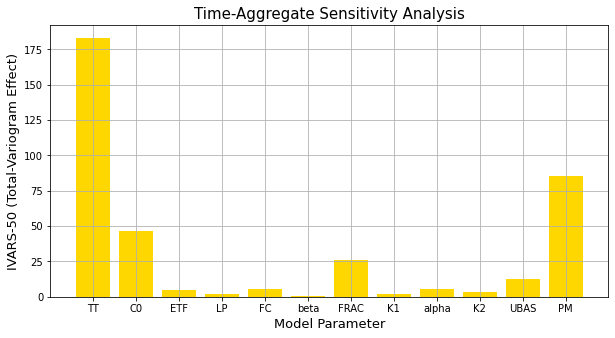

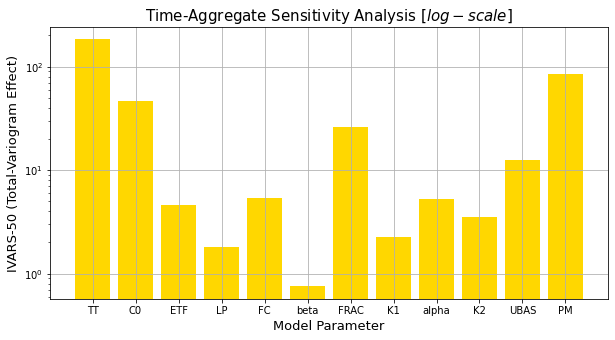

In [8]:
# Plot time-aggregate sensitivity indices of Experiment 1
ivars_scale = 0.5   # Choose the scale range of interest, e.g., 0.1, 0.3, or 0.5

cols = experiment_1.parameters.keys()
time_aggregate_SA = experiment_1.ivars.aggregate.unstack(level=0)[cols]

fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols,time_aggregate_SA.loc[pd.IndexSlice[ ivars_scale ]], color='gold')
plt.gca().set_title (r'Time-Aggregate Sensitivity Analysis', fontsize = 15)
plt.gca().set_ylabel(r'IVARS-50 (Total-Variogram Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().set_yscale('linear')
plt.gca().grid()

fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols,time_aggregate_SA.loc[pd.IndexSlice[ ivars_scale ]], color='gold')
plt.gca().set_title (r'Time-Aggregate Sensitivity Analysis $[log-scale]$', fontsize = 15)
plt.gca().set_ylabel(r'IVARS-50 (Total-Variogram Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().set_yscale('log')
plt.gca().grid()

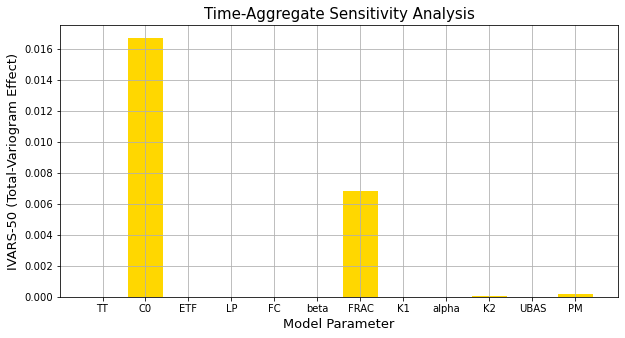

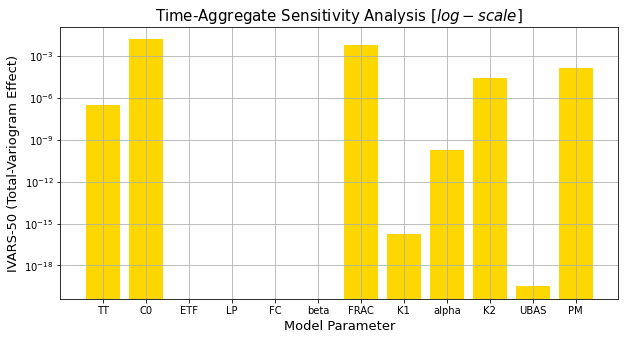

In [9]:
# Plot time-aggregate sensitivity indices of Experiment 2
ivars_scale = 0.5   # Choose the scale range of interest, e.g., 0.1, 0.3, or 0.5

cols = experiment_2.parameters.keys()
time_aggregate_SA = experiment_2.ivars.aggregate.unstack(level=0)[cols]

fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols,time_aggregate_SA.loc[pd.IndexSlice[ ivars_scale ]], color='gold')
plt.gca().set_title (r'Time-Aggregate Sensitivity Analysis', fontsize = 15)
plt.gca().set_ylabel(r'IVARS-50 (Total-Variogram Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().set_yscale('linear')
plt.gca().grid()

fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols,time_aggregate_SA.loc[pd.IndexSlice[ ivars_scale ]], color='gold')
plt.gca().set_title (r'Time-Aggregate Sensitivity Analysis $[log-scale]$', fontsize = 15)
plt.gca().set_ylabel(r'IVARS-50 (Total-Variogram Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().set_yscale('log')
plt.gca().grid()

### Appendix: An example of Step 2 above

The cells below run the HBV-SASK model semi-externally for demonstration purposes only. For real external models, the users have to figure out how to run their models for different inputs.

In [ ]:
from varstool import Model
import hbv

In [ ]:
def custom_HBV_SASK_2(x):
    param = x.to_dict()
    # running the HBV-SASK Model
    basin = 'Oldman Basin'  # choose the basin of interest, either 'Oldman Basin' or 'Banff Basin'
    flux, state, forcing = hbv.HBV_SASK(basin, param)
    
    start_day ='2005-10-01'  # choose the start date for the period of interest
    end_day   ='2006-09-30'  # choose the end date for the period of interest
    
    # choosing the flux or state variable of interest to report
    out = flux['Q_cms'][start_day:end_day]  # 'Q_cms' (streamflow) is an example flux
#     out = state['SMS'][start_day:end_day]   # 'SMS' (soil moisture storage) is an example state variable

    return out

In [ ]:
HBV_model = Model(custom_HBV_SASK_2)

In [ ]:
# Run HBV-SASK for Experiment 1
# run the model and generate a csv file that looks similar to the dataframe below (model results with no star points)
star_points_eval = Ex1_star_points.apply(custom_HBV_SASK_2, axis=1, result_type='expand')
star_points_eval.to_csv('8b - Ex1_model_time_series_outputs.csv')

In [ ]:
# Run HBV-SASK for Experiment 2
# run the model and generate a csv file that looks similar to the dataframe below (model results with no star points)
star_points_eval = Ex2_star_points.apply(custom_HBV_SASK_2, axis=1, result_type='expand')
star_points_eval.to_csv('8b - Ex2_model_time_series_outputs.csv')

All done!